<a href="https://colab.research.google.com/github/heisenbug47/Data-Science/blob/master/Exercise_8_Answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [0]:
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [0]:
def get_data(filename):
    with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter=',')
        first_line = True
        temp_images = []
        temp_labels = []
        for row in csv_reader:
            if first_line:
                # print("Ignoring first line")
                first_line = False
            else:
                temp_labels.append(row[0])
                image_data = row[1:785]
                image_data_as_array = np.array_split(image_data, 28)
                temp_images.append(image_data_as_array)
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')
    return images, labels



In [0]:
training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

print("\nTraining Dimensions:")
print(training_images.shape)
print(training_labels.shape)
print("\nTest Dimensions:")
print(testing_images.shape)
print(testing_labels.shape)


Training Dimensions:
(27455, 28, 28)
(27455,)

Test Dimensions:
(7172, 28, 28)
(7172,)


In [0]:
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    rescale=1. / 255)

print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)])

model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit_generator(train_datagen.flow(training_images, 
                                                 training_labels, 
                                                 batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=100,
                              validation_data=validation_datagen.flow(testing_images, 
                                                                      testing_labels, 
                                                                      batch_size=32),
                              validation_steps=len(testing_images) / 32)

model.evaluate(testing_images, testing_labels)


W0702 08:58:08.185979 140233706182528 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/100
858/857 [==============================] - 18s 21ms/step - loss: 2.8723 - acc: 0.1347 - val_loss: 2.0430 - val_acc: 0.3518
Epoch 2/100
858/857 [==============================] - 15s 17ms/step - loss: 2.2013 - acc: 0.3029 - val_loss: 1.4983 - val_acc: 0.5300
Epoch 3/100
858/857 [==============================] - 15s 17ms/step - loss: 1.8343 - acc: 0.4139 - val_loss: 1.2353 - val_acc: 0.5778
Epoch 4/100
858/857 [==============================] - 15s 18ms/step - loss: 1.5871 - acc: 0.4887 - val_loss: 1.0402 - val_acc: 0.6364
Epoch 5/100
858/857 [==============================] - 15s 18ms/step - loss: 1.4238 - acc: 0.5399 - val_loss: 1.0077 - val_acc: 0.6465
Epoch 6/100
858/857 [==============================] - 16s 18ms/step - loss: 1.3028 - acc: 0.5794 - val_loss: 0.9338 - val_acc: 0.6613
Epoch 7/100
858/857 [==============================] - 15s 18ms/step - loss: 1.1967 - acc: 0.6091 - val_loss: 0.7385 - val_acc: 0.7388
Epoch 8/100
858/857 [==============================] - 

[2061.442073313537, 0.18432795]

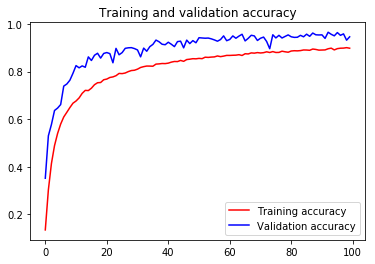

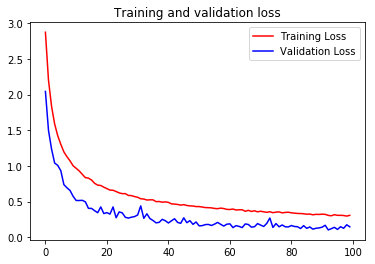

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()